In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
x_train = np.array([50, 80, 100, 120, 150, 180, 200, 230, 250, 280]) #Rainfall in centimeters
y_train = np.array([1.2, 2.0, 2.5, 3.0, 3.7, 4.1, 4.6, 5.0, 5.3, 5.8]) #Crop yeild in Kg
m = x_train.shape[0]

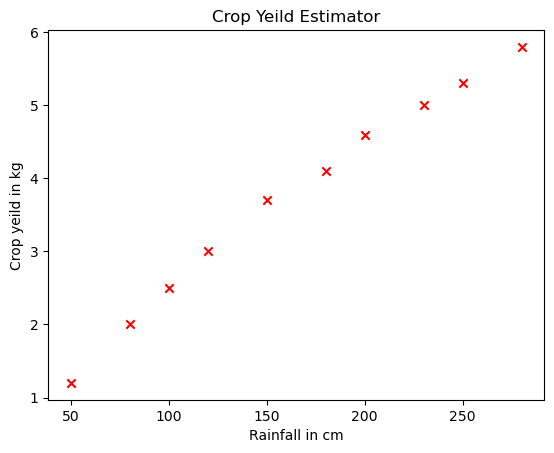

In [43]:
plt.scatter(x_train,y_train,marker="x",c="r",label="Training data set")
plt.xlabel("Rainfall in cm")
plt.ylabel("Crop yeild in kg")
plt.title("Crop Yeild Estimator")
plt.show()

In [81]:
w = 0.022
b = 0.000195


In [83]:
def predict_yeild(x,w,b,m):
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

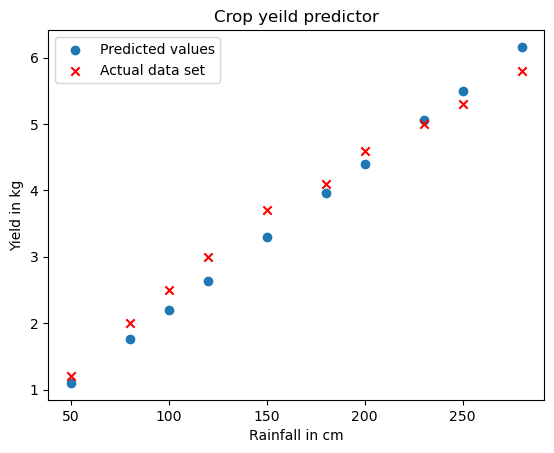

In [85]:
temp_f_wb = predict_yeild(x_train,w,b,m)
plt.scatter(x_train,temp_f_wb,label="Predicted values")
plt.scatter(x_train,y_train,marker="x",c="r",label="Actual data set")
plt.title("Crop yeild predictor")
plt.xlabel("Rainfall in cm")
plt.ylabel("Yield in kg")
plt.legend()
plt.show()

In [49]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb-y[i])**2
    return cost/(2*m)

In [51]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw+=dj_dw_i
        dj_db+=dj_db_i
    return dj_dw/m,dj_db/m


In [53]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters):
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    return w,b

In [97]:
w_start = 0
b_start = 0
alpha = 1.0e-8
num = 100000
print(x_train)
w,b = gradient_descent(x_train,y_train,w_start,b_start,alpha,num)
print(f"w : {w}, b: {b}")

[ 50  80 100 120 150 180 200 230 250 280]
w : 0.0221791420719473, b: 0.00019539689838135157


In [101]:
rain = int(input("Enter the rainfall in cms : "))
print("Predicted yeild is : ",w*rain+b," kgs")

Enter the rainfall in cms :  230


Predicted yeild is :  5.10139807344626  kgs
